In [ ]:
pip install mlxtend --upgrade 

In [2]:
pip install pandas --upgrade 

     |████████████████████████████████| 11.3 MB 10.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
import pandas as pd
import csv
pd.__version__

'1.3.4'

In [2]:
skip=[x for x in range(15,22)]
df=pd.read_csv('/content/Fake news dataset(1).csv' ,quoting=0, encoding= 'unicode_escape',error_bad_lines=False,engine='python')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 1071: unexpected end of data


In [3]:
df.head()

,Unnamed: 0,id,title,author,text,label
0,0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
3,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
4,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0


In [ ]:
df=df.drop(columns=['Unnamed: 0','id'])
df.head()

,title,author,text,label
0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
3,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
4,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1657 non-null   object
 1   author  1543 non-null   object
 2   text    1706 non-null   object
 3   label   1710 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 53.6+ KB


In [ ]:
df.isnull().sum()

title      53
author    167
text        4
label       0
dtype: int64

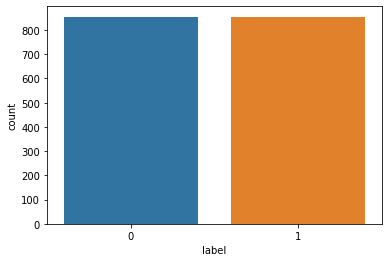

In [ ]:
import seaborn as sns
sns.countplot(x='label', data = df)

In [ ]:
df['text']

0       House Dem Aide: We Didnât Even See Comeyâs...
1       Ever get the feeling your life circles the rou...
2       Videos 15 Civilians Killed In Single US Airstr...
3       Print \nAn Iranian woman has been sentenced to...
4       In these trying times, Jackie Mason is the Voi...
                              ...                        
1705    American Renaissance, October 31, 2016 Share T...
1706    Friday 18 November 2016 by Alex Webster Manneq...
1707    Obama pushes illegal immigrants to vote in U.S...
1708    VATICAN CITY  â   For a while, Senator Berni...
1709    While ordinary Americans nationwide work on Th...
Name: text, Length: 1710, dtype: object

In [ ]:
import numpy as np
df['text'] = df['text'].str.strip()
df['text'] = df['text'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
import numpy as np
df['title'] = df['title'].str.strip()
df['title'] = df['title'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.dropna(subset=['text'], inplace=True)
df.dropna(subset=['title'], inplace=True)
print(df.shape)
print(df.isnull().sum())

(1642, 4)
title       0
author    163
text        0
label       0
dtype: int64


In [ ]:
df=df.fillna('')
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import string
import re
from nltk.tokenize import RegexpTokenizer

STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tokenizer = RegexpTokenizer(r'\w+')
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
def preprocesses_data(data):
  data = data.apply(lambda text: cleaning_stopwords(text))
  data= data.apply(lambda x: cleaning_punctuations(x))
  data = data.apply(lambda x: cleaning_repeating_char(x))
  data= data.apply(lambda x: cleaning_email(x))
  data= data.apply(lambda x: cleaning_URLs(x))
  data = data.apply(lambda x: cleaning_numbers(x))
  data = data.apply(tokenizer.tokenize)
  data= data.apply(lambda x: stemming_on_text(x))
  data = data.apply(lambda x: lemmatizer_on_text(x))
  data = data.apply(lambda x: ' '.join(x))

  return data

In [ ]:
train_data=preprocesses_data(df['text'])

In [ ]:
print('Before Preprocessed data:\n',df['text'][1])

Before Preprocessed data:
 Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed âno debate so far as I could ascertain as to who their spokesman was to beâ (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). âI am very glad that Miss Adams made it clear that what I am speaking for today is all of us â  the 400 of us,â Miss Rodham told her classmates. After appointing herself Edger Ber

In [ ]:
print('Preprocessed data:\n',train_data[1])

Preprocessed data:
 ever get fele life circl roundabout rather head straight line toward intend destin hilari clinton remain big woman campu leafi liber welesley masachuset everywher el vote like inaugur dre remaind day way mi havisham forev wore wede dre speak great expect hilari rodham overflow year ago first adres welesley graduat cla the presid coleg inform gather student nede â no debat far I could ascertain spokesman beâ kind like democrat primari minu term unknown even seven sister schol â I glad mi adam made clear I speak today u â usâ mi rodham told clasmat after apoint edger bergen charli mccarthi mortim snerd atend bespectacl grani glase award matronli wisdom â least john lenon wisdom tok isu previou speaker despit becom first win elect seat U S senat sinc reconstruct edward broke came critic cale â empathyâ goal protestor critic tactic though clinton senior thesi saul alinski lament â black power demagoguesâ â elitist arog repres intoleranceâ within new left similar word co

In [ ]:
x = train_data
y = df['label'].values

# TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1313, 34388)
Test size: (329, 34388)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
import matplotlib.pyplot as plt
target_names=['Fake News', 'Real News']

# predict on train data
X_train_predict = model.predict(X_train)
# train_accuracy
train_accuracy = accuracy_score(y_train, X_train_predict)
print('Train Accuracy:',train_accuracy)
# predict on test data
X_test_predict = model.predict(X_test)
# test_accuracy
test_accuracy = accuracy_score(y_test, X_test_predict)
print('Test Accuracy:',test_accuracy)

Train Accuracy: 0.9916222391469917
Test Accuracy: 0.9148936170212766


In [ ]:
cm_train=confusion_matrix(y_test, X_test_predict)
print(cm_train)

[[156  19]
 [  9 145]]


In [ ]:
print(classification_report(y_test, X_test_predict, target_names=target_names))

              precision    recall  f1-score   support

   Fake News       0.95      0.89      0.92       175
   Real News       0.88      0.94      0.91       154

    accuracy                           0.91       329
   macro avg       0.91      0.92      0.91       329
weighted avg       0.92      0.91      0.91       329



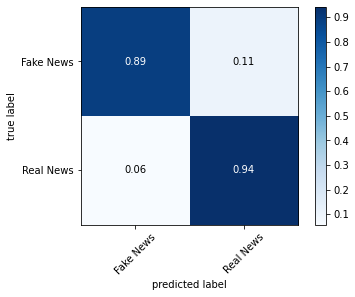

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_train,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=target_names)
plt.show()

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Fake_news/models'):
    os.makedirs('/content/drive/MyDrive/Fake_news/models')

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Fake_news/models/TFIDF.sav'
pickle.dump(model, open(filename, 'wb'))

# TFIDF Vectorizer + features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1313, 5000)
Test size: (329, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=5)
model.fit(X_train, y_train)

LogisticRegression(C=5)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
import matplotlib.pyplot as plt
target_names=['Fake News', 'Real News']

# predict on train data
X_train_predict = model.predict(X_train)
# train_accuracy
train_accuracy = accuracy_score(y_train, X_train_predict)
print('Train Accuracy:',train_accuracy)
# predict on test data
X_test_predict = model.predict(X_test)
# test_accuracy
test_accuracy = accuracy_score(y_test, X_test_predict)
print('Test Accuracy:',test_accuracy)

Train Accuracy: 0.9984767707539984
Test Accuracy: 0.9179331306990881


In [ ]:
cm_train=confusion_matrix(y_test, X_test_predict)
print(cm_train)

[[161  14]
 [ 13 141]]


In [ ]:
print(classification_report(y_test, X_test_predict, target_names=target_names))

              precision    recall  f1-score   support

   Fake News       0.93      0.92      0.92       175
   Real News       0.91      0.92      0.91       154

    accuracy                           0.92       329
   macro avg       0.92      0.92      0.92       329
weighted avg       0.92      0.92      0.92       329



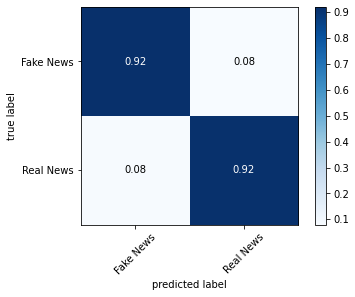

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_train,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=target_names)
plt.show()

In [ ]:
filename = '/content/drive/MyDrive/Fake_news/models/TFIDF_featured.sav'
pickle.dump(model, open(filename, 'wb'))

# Words Embendings

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(x)
sequences = tok.texts_to_sequences(x)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
print('sequences',sequences[1])
print('\nsequences_matrix',sequences_matrix[1])

sequences [405, 53, 1286, 157, 640, 349, 397, 435, 1111, 84, 34, 284, 317, 71, 580, 303, 82, 16, 1471, 40, 57, 1679, 446, 270, 294, 84, 19, 302, 41, 1670, 1810, 798, 5, 24, 834, 251, 1008, 566, 1023, 1, 321, 628, 223, 8, 36, 1488, 421, 16, 86, 1014, 579, 35, 1054, 253, 1, 8, 1679, 96, 434, 8, 446, 272, 60, 1, 1679, 126, 358, 865, 772, 1272, 1, 258, 503, 292, 159, 1389, 1827, 585, 161, 41, 443, 43, 982, 60, 2, 196, 131, 1273, 273, 263, 128, 1, 964, 263, 1506, 257, 34, 671, 1, 217, 151, 1, 348, 621, 14, 293, 822, 412, 51, 85, 794, 1, 1096, 1, 33, 11, 412, 8, 123, 798, 49, 26, 207, 630, 273, 6, 1, 155, 983, 155, 1242, 983, 60, 57, 278, 194, 155, 983, 177, 26, 15, 177, 26, 1286, 138, 702, 35, 5, 1, 983, 1159, 569, 2, 162, 139, 1159, 35, 567, 17, 428, 358, 1575, 1811, 1520, 147, 34, 184, 943, 505, 95, 1979, 698, 61, 27, 30, 17, 1, 9, 119, 119, 150, 911, 1643, 2, 43, 1, 1616, 185, 359, 248, 34, 513, 55, 1693, 1, 1, 1, 1229, 1, 22, 1076, 1000, 359, 1, 139, 529, 565, 30, 17, 887, 744, 1000, 1,

In [ ]:
sequences_matrix.shape

(1642, 500)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1313, 500)
Test size: (329, 500)


# word Embendings Model

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(32,kernel_regularizer=regularizers.l2(0.01))(layer) 
    layer = Dropout(0.75)(layer) 
    layer = Dense(1,name='out_layer',kernel_regularizer=regularizers.l2(0.01))(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])  

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=8, 
                          verbose=1, 
                          restore_best_weights=True)
callbacks=[earlystop]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 out_layer (Dense)           (None, 1)                 33        
                                                                 
Total params: 110,657
Trainable params: 110,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,Y_train,batch_size=32,epochs=100,
                  validation_data=(X_test,Y_test),
                  callbacks=callbacks)

Epoch 1/100
42/42 [==============================] - 16s 241ms/step - loss: 4.7400 - accuracy: 0.5179 - val_loss: 3.0717 - val_accuracy: 0.5319
Epoch 2/100
42/42 [==============================] - 10s 250ms/step - loss: 3.4065 - accuracy: 0.5179 - val_loss: 2.3581 - val_accuracy: 0.5319
Epoch 3/100
42/42 [==============================] - 10s 233ms/step - loss: 2.7987 - accuracy: 0.5179 - val_loss: 2.2267 - val_accuracy: 0.5319
Epoch 4/100
42/42 [==============================] - 10s 235ms/step - loss: 2.5488 - accuracy: 0.5179 - val_loss: 2.1246 - val_accuracy: 0.5319
Epoch 5/100
42/42 [==============================] - 10s 230ms/step - loss: 2.3916 - accuracy: 0.5179 - val_loss: 2.0451 - val_accuracy: 0.5319
Epoch 6/100
42/42 [==============================] - 10s 232ms/step - loss: 2.2333 - accuracy: 0.5179 - val_loss: 1.9696 - val_accuracy: 0.5319
Epoch 7/100
42/42 [==============================] - 10s 228ms/step - loss: 2.1007 - accuracy: 0.5179 - val_loss: 1.9027 - val_accuracy:

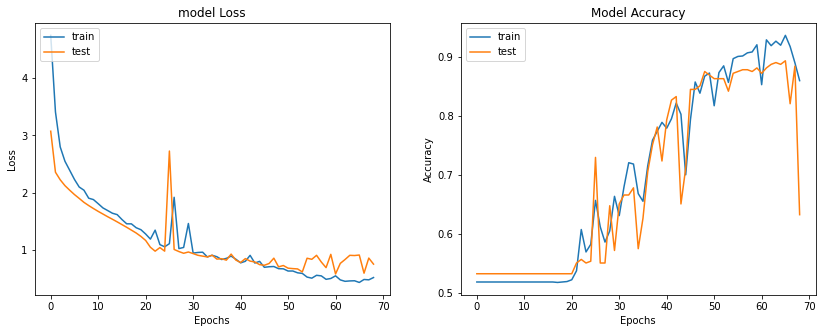

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 86ms/step - loss: 0.5883 - accuracy: 0.8723
Test set
  Accuracy: 0.87


confusion matrix


[[161  14]
 [ 28 126]]




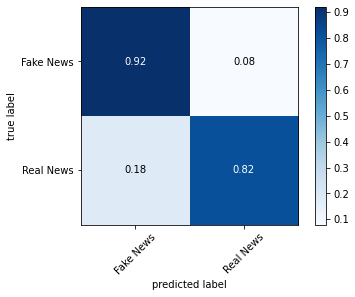

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
target_names=['Fake News', 'Real News']
accr1 = model.evaluate(X_test,Y_test) 
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))
y_pred1 = model.predict(X_test)
y_pred = (y_pred1 > 0.5) 
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=CR,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=target_names)
plt.show()

# Word Embending Model Optimization

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from keras import regularizers
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64,kernel_regularizer=regularizers.l2(0.01))(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(16,kernel_regularizer=regularizers.l2(0.01))(layer) 
    layer = Activation('relu')(layer)
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])  

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 50)           100000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 out_layer (Dense)           (None, 1)                 17  

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=8, 
                          verbose=1, 
                          restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=4, 
                              verbose=1, 
                              min_delta=0.0001)
callbacks = [ earlystop,reduce_lr]

In [ ]:
history=model.fit(X_train,Y_train,batch_size=16,epochs=100,
                  validation_data=(X_test,Y_test),
                  callbacks=callbacks)

Epoch 1/100
83/83 [==============================] - 19s 201ms/step - loss: 1.7065 - accuracy: 0.6184 - val_loss: 1.6261 - val_accuracy: 0.6930 - lr: 1.0000e-04
Epoch 2/100
83/83 [==============================] - 17s 199ms/step - loss: 1.5556 - accuracy: 0.7441 - val_loss: 1.4868 - val_accuracy: 0.7599 - lr: 1.0000e-04
Epoch 3/100
83/83 [==============================] - 16s 198ms/step - loss: 1.4090 - accuracy: 0.7959 - val_loss: 1.3272 - val_accuracy: 0.6869 - lr: 1.0000e-04
Epoch 4/100
83/83 [==============================] - 16s 195ms/step - loss: 1.2465 - accuracy: 0.7768 - val_loss: 1.1920 - val_accuracy: 0.7872 - lr: 1.0000e-04
Epoch 5/100
83/83 [==============================] - 16s 195ms/step - loss: 1.0668 - accuracy: 0.8195 - val_loss: 1.0122 - val_accuracy: 0.8328 - lr: 1.0000e-04
Epoch 6/100
83/83 [==============================] - 16s 191ms/step - loss: 0.8827 - accuracy: 0.8675 - val_loss: 0.9038 - val_accuracy: 0.8328 - lr: 1.0000e-04
Epoch 7/100
83/83 [===============

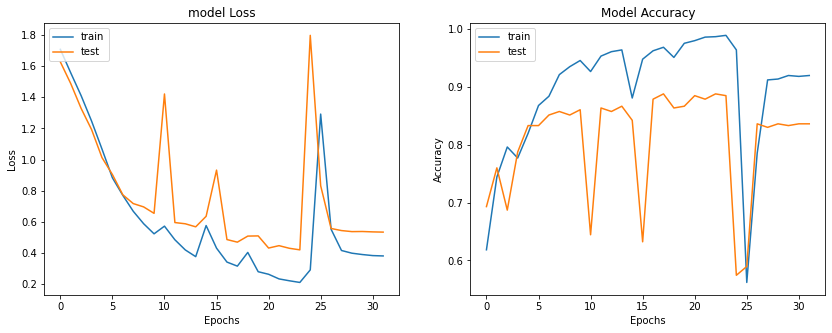

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 80ms/step - loss: 0.4207 - accuracy: 0.8845
Test set
  Accuracy: 0.88


confusion matrix


[[159  16]
 [ 22 132]]




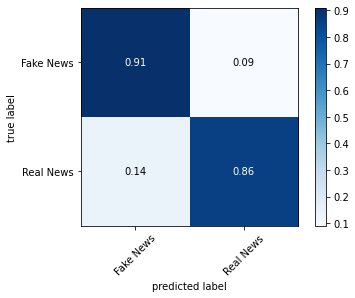

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
target_names=['Fake News', 'Real News']
accr1 = model.evaluate(X_test,Y_test) 
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))
y_pred1 = model.predict(X_test)
y_pred = (y_pred1 > 0.5) 
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=CR,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=target_names)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Projects/models/words_embendings.h5')

# T-SNE
Top five common words associated with thee most common fake news title

In [ ]:
indexNames = df[df['label'] == 1].index
df.drop(indexNames , inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df['title']

0      FLYNN: Hillary Clinton, Big Woman on Campus - ...
1      Jackie Mason: Hollywood Would Love Trump if He...
2      BenoÃ®t Hamon Wins French Socialist Partyâs ...
3      Excerpts From a Draft Script for Donald Trumpâ...
4      A Back-Channel Plan for Ukraine and Russia, Co...
                             ...                        
850    Mike Allen, Politicoâs Newsletter Pioneer, I...
851    Police: Gang of 5 Arrested for Murders of 2 Co...
852    Islamic State Teen Jailed For Attacking Jewish...
853    Bernie Sanders Meets With Pope Francis - The N...
854    Comey Crawl: D.C. Bars Plan Testimony Drink Sp...
Name: title, Length: 855, dtype: object

In [ ]:
import re
def build_corpus(data):
    corpus = []
    for col in data:
        word_list = col.split(" ")
        # print(word_list)
        for index in range(len(word_list)):
          words=word_list[index]
          regex = re.compile('[^a-zA-Z]')
          word=regex.sub('', words)
          word_list[index]=word.lower()
        word_list = list(filter(None, word_list))
        corpus.append(word_list)

            
    return corpus

corpus = build_corpus(df['title'])        

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(corpus,  min_count=0,size= 20,workers=3, window =3, sg = 1)
print(model)

Word2Vec(vocab=3021, size=20, alpha=0.025)


In [ ]:
model.save('/content/drive/MyDrive/Projects/models/Word2Vec.model')
model.save('/content/drive/MyDrive/Projects/models/Word2Vec.bin')

In [ ]:
model.most_similar(positive=['trump'])#, topn = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('a', 0.9984596371650696),
 ('on', 0.9980091452598572),
 ('trumps', 0.9978289604187012),
 ('is', 0.9977848529815674),
 ('us', 0.997636079788208),
 ('of', 0.9976303577423096),
 ('not', 0.9973540902137756),
 ('to', 0.9973369836807251),
 ('and', 0.9971797466278076),
 ('in', 0.9970892667770386)]

In [ ]:
from nltk.probability import FreqDist
term_fd = FreqDist(df['title'])
com_title=term_fd.most_common(3)
com_title

[('Pregnancy Changes the Brain in Ways That May Help Mothering - The New York Times',
  2),
 ('Scarborough: Trump Poops His Pants, Calls It â\x80\x99Modern Artâ\x80\x99 - Breitbart',
  2),
 ('When Cooking, Invest Time. Or Work. Not Both. - The New York Times', 2)]

In [ ]:
regex = re.compile('[^a-zA-Z]')
words_list=[]
for title in com_title:
  title=title[0].split(" ")
  for index in range(len(title)):
    words=title[index]
    regex = re.compile('[^a-zA-Z]')
    word=regex.sub('', words)
    title[index]=word.lower()
  title = list(filter(None, title))
  words_list.extend(title)
print(words_list)

['pregnancy', 'changes', 'the', 'brain', 'in', 'ways', 'that', 'may', 'help', 'mothering', 'the', 'new', 'york', 'times', 'scarborough', 'trump', 'poops', 'his', 'pants', 'calls', 'it', 'modern', 'art', 'breitbart', 'when', 'cooking', 'invest', 'time', 'or', 'work', 'not', 'both', 'the', 'new', 'york', 'times']


In [ ]:
most_sim_words=[]
for word in words_list:
  most_sim_words.extend(model.most_similar(positive=[word]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(most_sim_words)

[('ryancare', 0.9057592153549194), ('catches', 0.8881143927574158), ('rodrigo', 0.880683422088623), ('our', 0.8760201334953308), ('wrestled', 0.8748348951339722), ('stop', 0.8743108510971069), ('shkreli', 0.8718591332435608), ('miss', 0.8713406324386597), ('firm', 0.8705377578735352), ('wimps', 0.8693000674247742), ('toddlers', 0.9330358505249023), ('keep', 0.9322726130485535), ('deliberate', 0.9302788376808167), ('including', 0.9298975467681885), ('wire', 0.9252595901489258), ('weary', 0.9247998595237732), ('corridor', 0.9209522604942322), ('clean', 0.9203680753707886), ('isiscribbed', 0.9194338321685791), ('division', 0.9193900227546692), ('open', 0.9846866726875305), ('baseball', 0.9842575788497925), ('windy', 0.9818552732467651), ('seattle', 0.9816489219665527), ('back', 0.9814990758895874), ('by', 0.9814740419387817), ('for', 0.9812405109405518), ('york', 0.9812142252922058), ('new', 0.9811786413192749), ('us', 0.9809197187423706), ('obamaera', 0.9751917123794556), ('has', 0.97390

In [ ]:
most_sim_words=list(dict.fromkeys(most_sim_words))
most_sim_words=sorted(most_sim_words ,key=lambda most_sim_words: most_sim_words[1],reverse=True)
most_sim_words[:5]

[('are', 0.9989033341407776),
 ('trumps', 0.9988275766372681),
 ('in', 0.9988079071044922),
 ('breitbart', 0.9988078474998474),
 ('breitbart', 0.9987797737121582)]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model, lists_words):
    labels = []
    tokens = []
    

    for word in lists_words:
        word=word[0]
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure()
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


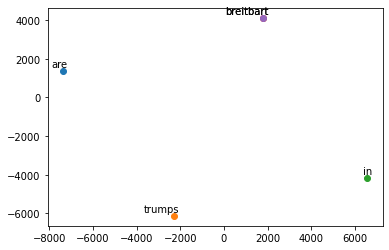

In [ ]:
# Top five common words associated with thee most common fake news title
tsne_plot(model,most_sim_words[:5])